# **Basic Set up**

In [16]:
#!pip3 install scikit-plot
import sys
!{sys.executable} -m pip install scikit-plot

In [17]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import scikitplot as skplt
import keras
import numpy as np

In [18]:
#load the models first

yaml_file = open('seq2seq_model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
seq2seq = keras.models.model_from_yaml(loaded_model_yaml)
# load weights into new model
seq2seq.load_weights("seq2seq_model.h5")
print("Loaded model from disk")


with open("seq2seq_trainHistoryDict.pkl",'rb') as f:
  seq2seq_history = pickle.load(f)
print(seq2seq_history)

Loaded model from disk
{'loss': [3.3858578205108643, 1.9403791427612305, 1.8063020706176758, 1.7335608005523682, 1.6854199171066284, 1.639456033706665, 1.5771923065185547, 1.509972333908081, 1.463924765586853, 1.4251590967178345, 1.3884693384170532, 1.353621482849121, 1.3221912384033203, 1.2941291332244873, 1.2685292959213257, 1.2451223134994507, 1.22343111038208, 1.2038624286651611, 1.1853235960006714, 1.1668901443481445, 1.1497256755828857, 1.132731318473816, 1.1167699098587036, 1.1026180982589722, 1.0892339944839478], 'accuracy': [0.6384649276733398, 0.651537299156189, 0.651537299156189, 0.6515565514564514, 0.6530793905258179, 0.6611741185188293, 0.6741880774497986, 0.6858180165290833, 0.6946889758110046, 0.7019827961921692, 0.7079861164093018, 0.7133748531341553, 0.7180314064025879, 0.7218257784843445, 0.7250357270240784, 0.7281034588813782, 0.7310645580291748, 0.73405522108078, 0.7371366620063782, 0.7409152388572693, 0.7445459961891174, 0.7474892139434814, 0.7503925561904907, 0.75

In [19]:
#load the models first

bin_yaml_file = open('binary_model.yaml', 'r')
bin_loaded_model_yaml = bin_yaml_file.read()
bin_yaml_file.close()
binary = keras.models.model_from_yaml(bin_loaded_model_yaml)
# load weights into new model
binary.load_weights("binary_model.h5")
print("Loaded model from disk")

with open("binary_trainHistoryDict.pkl",'rb') as f:
  binary_history = pickle.load(f)
print(binary_history)

Loaded model from disk
{'loss': [0.6945661306381226, 0.6937439441680908, 0.6934942007064819, 0.6933507323265076, 0.6933355927467346, 0.6932984590530396, 0.6932350397109985, 0.6934253573417664, 0.6932156682014465, 0.6930561661720276, 0.6931806206703186, 0.693247377872467, 0.6930462121963501, 0.6931790709495544, 0.6931394934654236, 0.6930608749389648, 0.6931629776954651, 0.6931103467941284, 0.6931147575378418, 0.6931352019309998, 0.6931052803993225, 0.6930826902389526, 0.6930902004241943, 0.6931689977645874, 0.6930494904518127], 'accuracy': [0.5006378889083862, 0.5023742914199829, 0.5022679567337036, 0.5018959045410156, 0.5020908117294312, 0.5049611926078796, 0.5038272142410278, 0.502675473690033, 0.5034728646278381, 0.5061128735542297, 0.504535973072052, 0.5043764710426331, 0.5073531866073608, 0.5063432455062866, 0.5053864121437073, 0.5060774683952332, 0.5065558552742004, 0.5054395794868469, 0.5073709487915039, 0.5052624344825745, 0.5055104494094849, 0.5064672827720642, 0.50618380308151

In [20]:
with open("y_pred.pkl",'rb') as pred:
  y_pred = pickle.load(pred)

with open("y_true.pkl",'rb') as true:
  y_true = pickle.load(true)

print(len(y_true))
print(len(y_pred))

10
10


In [21]:
EPOCHS = 25

# **Seq2Seq Plots**

1. Loss Plot
2. Acc Plot
3. Test Acc,Loss (already in the terminal output)

Text(0.5, 1.0, 'Loss for Seq2Seq')

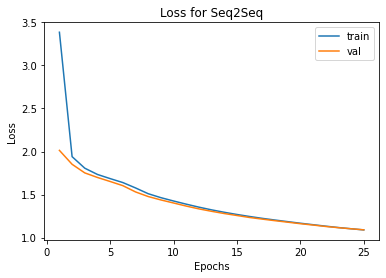

In [22]:
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Seq2Seq")

Text(0.5, 1.0, 'Accuracy for Seq2Seq')

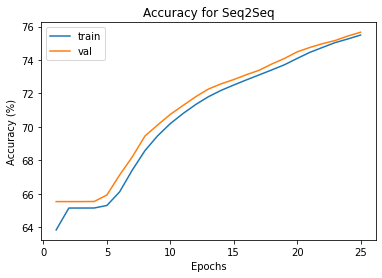

In [23]:
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['accuracy'])*100.00,label='train')
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['val_accuracy']) * 100.0,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Seq2Seq")

# **Binary Model Plots**

1. Loss Plot
2. Acc Plot
3. ROC Plot
4. PR plot
5. F1 score report

In [24]:
from collections import Counter
print(dict(Counter(y_true)))

{0: 4, 1: 6}


In [25]:
y_pred

array([[0.5060593 ],
       [0.50479937],
       [0.50610214],
       [0.5061045 ],
       [0.5061261 ],
       [0.5065825 ],
       [0.5061125 ],
       [0.5061115 ],
       [0.4915524 ],
       [0.5045523 ]], dtype=float32)

Text(0.5, 1.0, 'Loss for Binary Classifier')

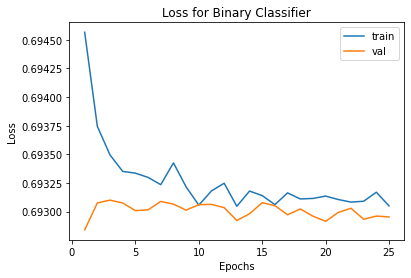

In [26]:
plt.plot(list(range(1,EPOCHS+1)), binary_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),binary_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Binary Classifier")

Text(0.5, 1.0, 'Accuracy for Binary Classifier')

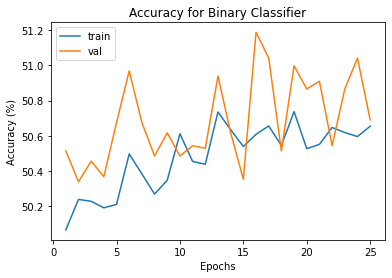

In [27]:
plt.plot(list(range(1,EPOCHS+1)), np.array(binary_history['accuracy'])*100.00,label='train')
plt.plot(list(range(1,EPOCHS+1)),np.array(binary_history['val_accuracy'])*100.00,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Binary Classifier")

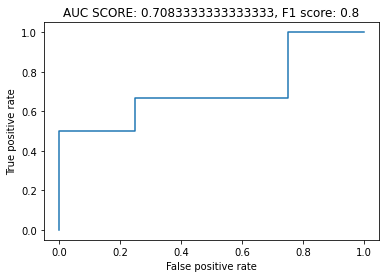

In [28]:
fpr, tpr, _ = roc_curve(y_true, y_pred)
auc_roc = roc_auc_score(y_true,y_pred) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(fpr, tpr)
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

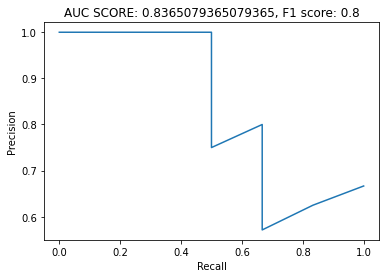

In [29]:
precision, recall, _ = precision_recall_curve(y_true, y_pred)
auc_roc = auc(recall,precision) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.show()

<Figure size 432x288 with 0 Axes>

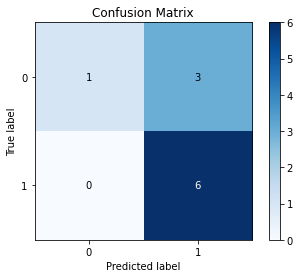

In [30]:
y_pred_f1 = y_pred > 0.5 #Basic threshold
plt.figure()
skplt.metrics.plot_confusion_matrix(y_true,y_pred_f1)
plt.show()